First Order System

$\tau_p \frac{dy}{dt} = -y + K_p u$

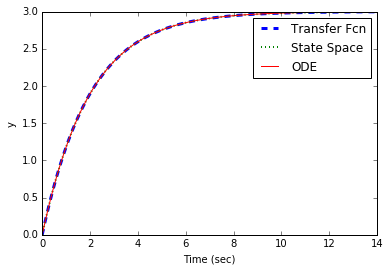

In [1]:
import numpy as np
from scipy import signal
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline


Kp = 3.0
taup = 2.0

# Transfer function
num = Kp
den = [taup,1.0]
sys1 = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys1)

# State space
A = [-1.0/taup]
B = [Kp/taup]
C = [1.0]
D = [0.0]
sys2 = signal.StateSpace(A,B,C,D)
t2,y2 = signal.step(sys2)

# ODE integration
def model(y,t):
    u = 1.0
    return -1.0/taup*y + Kp/taup * u
t3 = np.linspace(0,14,100)
y3 = odeint(model,0,t3)

plt.figure(1)
plt.plot(t1,y1,'b--',linewidth=3)
plt.plot(t2,y2,'g:',linewidth=2)
plt.plot(t3,y3,'r-',linewidth=1)
plt.legend(['Transfer Fcn','State Space','ODE'],loc='best')
plt.xlabel('Time (sec)')
plt.ylabel('y')
plt.show()

Second Order System

$\tau_s^2 \frac{d^2y}{dt^2} + 2\zeta \tau_s \frac{dy}{dt} + y = K_p u(t-\theta_p)$

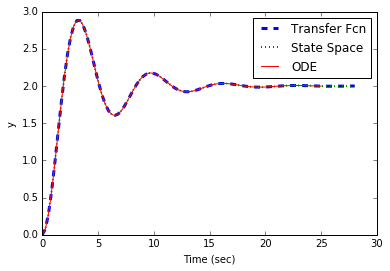

In [7]:
import numpy as np
from scipy import signal
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

Kp = 2.0  # gain
tau = 1.0  # time constant
zeta = 0.25  # damping factor
theta = 0.0  # no time delay
du = 1.0     # change in u

# 1. Transfer fcn
num = [Kp]
den = [tau**2,2*zeta*tau,1]
sys1 = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys1)

# 2. State space
A = [[0.0,1.0],[-1/tau**2,-2*zeta/tau]]
B = [[0.0],[Kp/tau**2]]
C = [1.0,0.0]
D = [0.0]
sys2 = signal.StateSpace(A,B,C,D)
t2,y2 = signal.step(sys2)

# ODE
def model(y,t):
    x = y[0]
    dxdt = y[1]
    dx2dt2 = (-2.0*zeta*tau * dxdt - x + Kp*du)/tau**2
    return [dxdt,dx2dt2]

t3 = np.linspace(0,25,100)
y3 = odeint(model,[0.0,0.0],t3)
y3 = y3[:,0]

plt.figure(1)
plt.plot(t1,y1,'b--',linewidth=3)
plt.plot(t2,y2,'g:',linewidth=2)
plt.plot(t3,y3,'r-',linewidth=1)
plt.legend(['Transfer Fcn','State Space','ODE'],loc='best')
plt.xlabel('Time (sec)')
plt.ylabel('y')
plt.show()